## Import Libraries

In [1]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Load Data

In [2]:
### Load S&P 500 dataset
stock_df = pd.read_excel('S&P500Dataset.xlsx')
stock_df = stock_df.rename(columns={"Close*": "Close", "Adj Close**": "Adj Close"})
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df.set_index('Date', inplace=True)
stock_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-02,4284.52,4300.58,4260.21,4288.39,4288.39,3938660000
2023-09-29,4328.18,4333.15,4274.86,4288.05,4288.05,3865960000
2023-09-28,4269.65,4317.27,4264.38,4299.70,4299.70,3846230000
2023-09-27,4282.63,4292.07,4238.63,4274.51,4274.51,3875880000
2023-09-26,4312.88,4313.01,4265.98,4273.53,4273.53,3472340000
...,...,...,...,...,...,...
2018-10-09,2882.51,2894.83,2874.27,2880.34,2880.34,3531690000
2018-10-08,2877.53,2889.45,2862.08,2884.43,2884.43,3381820000
2018-10-05,2902.54,2909.64,2869.29,2885.57,2885.57,3340820000


In [3]:
### Load YFinance stock data - Johnson & Johnson / Mastercard
tickers = ['JNJ', 'MA']
company_data = {}
for ticker in tickers:
    company_data[ticker] = yf.download(ticker, start="2018-10-01", end="2023-10-01")

print(company_data['JNJ'].head())
print(company_data['MA'].head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-10-01  138.259995  139.850006  138.000000  139.690002  122.206741   
2018-10-02  139.789993  140.729996  139.649994  140.479996  122.897842   
2018-10-03  140.539993  141.270004  138.880005  139.029999  121.629356   
2018-10-04  138.550003  139.529999  137.320007  139.350006  121.909302   
2018-10-05  139.800003  140.250000  138.559998  139.100006  121.690605   

             Volume  
Date                 
2018-10-01  4871800  
2018-10-02  6439100  
2018-10-03  5411800  
2018-10-04  4738700  
2018-10-05  4309300  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-10-01  224.839996  225.350006  223.0

In [4]:
# Summary Statistics for JNJ
print("JNJ Summary Statistics:\n", company_data['JNJ'].describe())

# Summary Statistics for MA
print("\nMA Summary Statistics:\n", company_data['MA'].describe())

JNJ Summary Statistics:
               Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    155.080199   156.269475   153.832242   155.085564   145.465795   
std      15.310655    15.324439    15.355220    15.345766    18.907799   
min     117.000000   118.559998   109.160004   111.139999   101.248993   
25%     141.467506   142.692493   140.340000   141.875004   127.574013   
50%     158.404999   159.884995   157.355003   158.400002   151.265633   
75%     167.047497   168.185001   165.710007   167.137501   161.380035   
max     185.100006   186.690002   184.179993   186.009995   178.456879   

             Volume  
count  1.258000e+03  
mean   8.285141e+06  
std    8.051753e+06  
min    2.114900e+06  
25%    5.631000e+06  
50%    6.840300e+06  
75%    8.520525e+06  
max    1.513195e+08  

MA Summary Statistics:
               Open         High          Low        Close    Adj Close  \
count  1258

## Cleaning and Sampling

In [5]:
### Missing Values 
print("S&P 500 Missing Values:\n", stock_df.isnull().sum())
print("\nJNJ Missing Values:\n", company_data['JNJ'].isnull().sum())
print("\nMA Missing Values:\n", company_data['MA'].isnull().sum())

S&P 500 Missing Values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

JNJ Missing Values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

MA Missing Values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Data Exploration

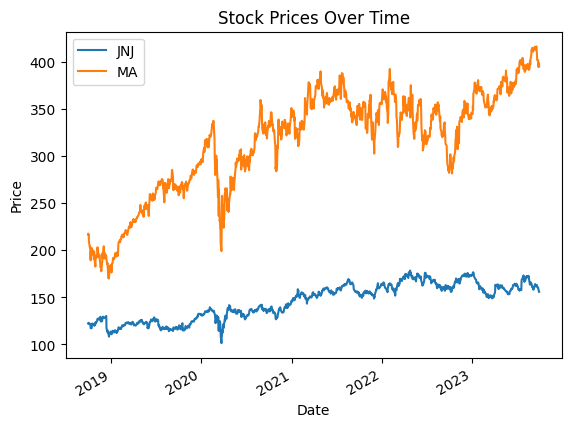

In [6]:
### Data Exploration - Stock Prices over time
plt.figure()
company_data['JNJ']['Adj Close'].plot(label='JNJ')
company_data['MA']['Adj Close'].plot(label='MA')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Correlation Matrix:
              JNJ        MA   S&P 500
JNJ      1.000000  0.815543  0.886998
MA       0.815543  1.000000  0.893749
S&P 500  0.886998  0.893749  1.000000


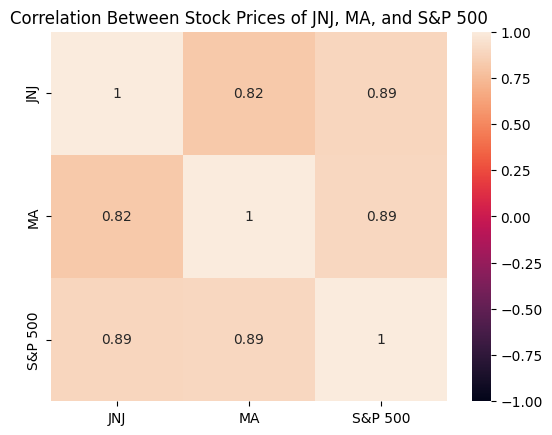

In [7]:
### Correlation
intersected_dates = stock_df.index.intersection(company_data['JNJ'].index)

stock_df_intersected = stock_df.loc[intersected_dates]
JNJ_intersected = company_data['JNJ'].loc[intersected_dates]
MA_intersected = company_data['MA'].loc[intersected_dates]

combined_close = pd.DataFrame()
combined_close['JNJ'] = JNJ_intersected['Adj Close']
combined_close['MA'] = MA_intersected['Adj Close']
combined_close['S&P 500'] = stock_df_intersected['Adj Close']

corr = combined_close.corr()
print("Correlation Matrix:")
print(corr)

plt.figure()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Between Stock Prices of JNJ, MA, and S&P 500')
plt.show()

## Proposed ML Techniques